# SK03.2 - Clusterung mit DBSCAN


Bei der Clusterung der Iris-Datenbank sind wir davon ausgegegangen, dass die Messdaten der verschiedenen Klassen um einen Mittelwert streuen. Dadurch konnten wir annehmen, dass die verschiedenen Cluster im wesentlichen _konvexe_ Mengen sind, und es nur einige Ausreißer gibt, die dann ggf. im falschen Cluster landen.

_k-Means_ mit seinem euklidischen Abstand ist dann das geeignete Mittel, um Cluster zu erkennen. Wenn jedoch die Messdaten in nicht konvexen Bereiche unterteilt sind, kann dieser Algorithmus nicht mehr korrekt arbeiten.

## Die Alternative zu k-Means: DBSCAN

Auch wenn die Bereiche der Messdaten nicht konvex sind, so sollten sie sich doch dadurch folgende Eigenschaften ausweisen:

* Die Daten eines einzelnen Bereichs liegen sehr eng beeinander
* Die Bereiche sind durch leere Zwischenräume isoliert

__DBSCAN__ steht für __Density-Based Spatial Clustering of Applications with Noise__. Es ist ein beliebter Clustering-Algorithmus, der hauptsächlich für die Erkennung von Clustern innerhalb eines Datensatzes auf Basis der _räumlichen Dichte_ der Datenpunkte verwendet wird. Im Gegensatz zu anderen Clustering-Methoden wie k-Means ist DBSCAN besonders gut darin, Cluster mit unterschiedlichen Formen und Größen zu erkennen und gleichzeitig Ausreißer (Noise) zu identifizieren und zu ignorieren.

DBSCAN ist ein mächtiges Werkzeug für Datenanalyse-Aufgaben, die eine flexible Clustererkennung erfordern, und bleibt aufgrund seiner Einfachheit und Effektivität in vielen praktischen Anwendungen beliebt.

## Die Idee hinter DBSCAN

DBSCAN verwendet zwei Parameter zur Clusterbildung:

* $\epsilon$: Ein Distanzschwellenwert, der die maximale Distanz zwischen zwei Datenpunkten angibt, damit diese als im selben Cluster betrachtet werden können.
* n_min: Die minimale Anzahl von Punkten, die innerhalb des Epsilon-Radius eines Datenpunktes liegen müssen, damit dieser Punkt als "Kernpunkt" betrachtet wird.

DBSCAN unterscheidet drei Sorten von Punkten in den Daten:

* __Kernpunkt__: Ein Punkt, der mindestens n_min Punkte innerhalb seines $\epsilon$-Radius hat (einschließlich sich selbst).

* __Randpunkt__: Ein Punkt, der weniger als n_min Punkte innerhalb seines $\epsilon$-Radius hat, aber Teil des $\epsilon$-Radius eines Kernpunktes ist.

* __Lärm__ (Noise): Ein Punkt, der weder ein Kern- noch ein Randpunkt ist.


Die Clusterbildung erfolgt nun so:

1. Der Algorithmus beginnt mit einem zufällig gewählten unbesuchten Punkt. Wenn dieser Punkt ein Kernpunkt ist, wird ein neuer Cluster gestartet, und alle direkt erreichbaren Punkte (innerhalb des $\epsilon$-Radius) werden diesem Cluster hinzugefügt. Dieser Prozess wird rekursiv für jeden neu hinzugefügten Punkt wiederholt, um den gesamten Cluster zu erkunden.

2. Falls der Anfangspunkt ein Randpunkt ist, wird er vorläufig als Lärm markiert, da er nicht genügend Nachbarn hat, um einen Cluster zu bilden. Er könnte jedoch später zu einem Teil eines Clusters werden, wenn er in der Nachbarschaft eines Kernpunktes liegt.

3. Punkte, die nach Abschluss des Verfahrens als Lärm markiert bleiben, gehören zu keinem Cluster.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Erstellung der Testdaten

Wir erzeugen mit Hilfe von sklearn geeignete Testdaten:

In [2]:
import sklearn.datasets as ds

X, y =  ds.make_blobs(n_samples = 10000 , centers = 3,  n_features = 2,random_state = 2)

## Visualisierung der Cluster

Wir tragen die Werte gegeneinander auf. 

<Figure size 640x480 with 0 Axes>

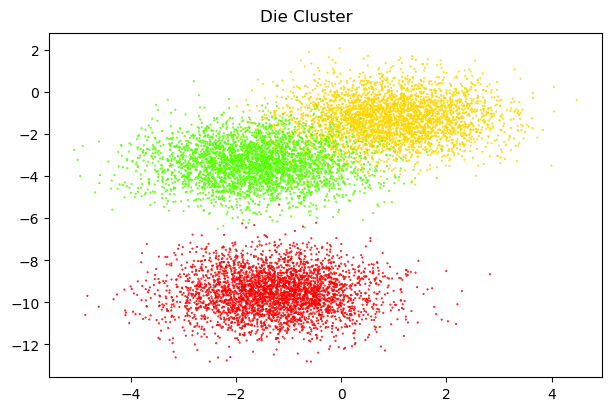

In [3]:
%matplotlib inline
plt.set_cmap('prism')
fig, ax = plt.subplots(figsize=(6,4), layout='constrained')

fig.suptitle("Die Cluster")
ax.scatter(X[:,0],X[:,1],c = y, marker='.', s= 1)

In [4]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = .1)
dbscan = dbscan.fit(X)
labels = dbscan.labels_

cluster = np.unique(labels) 

outlier = np.argwhere(labels == -1)
print(f'Anzahl der Punkte:\t{len(X):,}\nAnzahl Ausreißer:\t{len(outlier):,}\nAnzahl der Cluster:\t{np.max(labels) + 1}')

Anzahl der Punkte:	10,000
Anzahl Ausreißer:	1,433
Anzahl der Cluster:	77


## Visualisierung


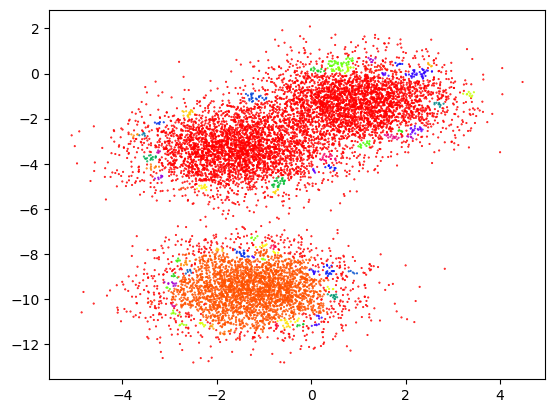

In [5]:
%matplotlib inline
cnorm = plt.Normalize(vmin=0, vmax=np.max(labels))

fig, ax = plt.subplots()
#ax.scatter(X[:,0],X[:,1],c = y,marker='.', s= 1)   
ax.scatter(X[:,0], X[:,1], c = labels, marker = ".", s=1, norm = cnorm)
#ax.scatter(X[outlier][0],X[ outlier][1],s = 50,marker='x')   
pass

### Zur Geschichte

Der DBSCAN-Algorithmus wurde 1996 von Martin Ester, Hans-Peter Kriegel, Jörg Sander und Xiaowei Xu vorgestellt. Die Entwicklung dieses Algorithmus erfolgte im Rahmen ihrer Forschungsarbeit an der Universität München in Deutschland. DBSCAN war eine Antwort auf die Notwendigkeit, einen Clustering-Algorithmus zu entwickeln, der effizient mit großen Datenmengen umgehen, Cluster unterschiedlicher Formen und Größen erkennen und dabei Ausreißer (Noise) effektiv behandeln kann.

### Links

* Clustering mit sklearn $\rightarrow$ [sklearn Dokumentation](https://scikit-learn.org/stable/modules/clustering.html)
* Wikipedia $\rightarrow$ [DBSCAN](https://de.wikipedia.org/wiki/DBSCAN)